In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Carregar a imagem
imagem = cv2.imread('circulos_1.png', cv2.IMREAD_GRAYSCALE)

#Suavização Gaussiano
imagem_suavizada = cv2.GaussianBlur(imagem, (9, 9), 2)

In [3]:
# Detectar círculos com HoughCircles
circulos = cv2.HoughCircles(
    imagem_suavizada,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=40,        # distância mínima entre centros
    param1=100,        # limiar superior para Canny
    param2=30,         # limiar para detecção de centros
    minRadius=30,      # raio mínimo esperado
    maxRadius=60       # raio máximo esperado
)

In [4]:
# Carregar imagem colorida para desenhar
imagem_colorida = cv2.imread('circulos_1.png')
saida = imagem_colorida.copy()


In [5]:
# Desenhar os círculos detectados
contador_circulos = 0
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for (x, y, r) in circulos[0, :]:
        cv2.circle(saida, (x, y), r, (0, 255, 0), 2)
        contador_circulos += 1

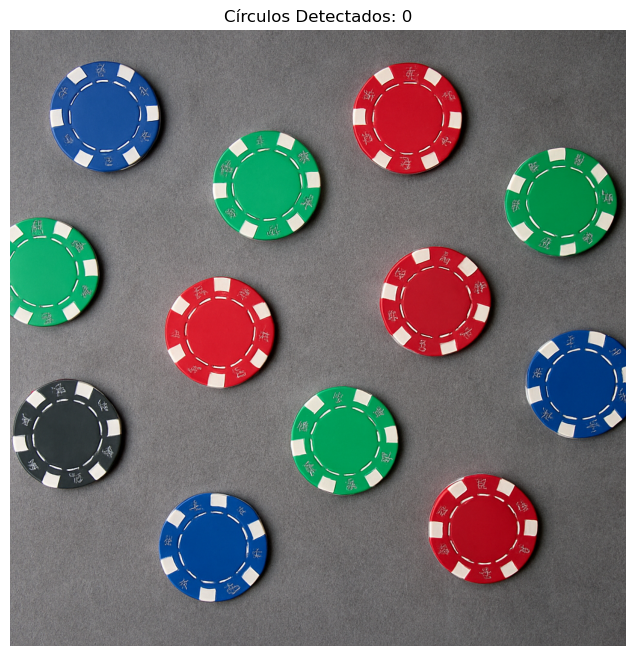

In [17]:
# Mostrar resultado
saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(saida_rgb)
plt.title(f'Círculos internos detectados: {contador_circulos}')
plt.axis('off')
plt.show()
